# Weather Prediction Using Arduino , DHT11 and Decision Tree Classifier

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from micromlgen import port
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [66]:
# Storing csv data to dataframe
weather_data = pd.read_csv('weather.csv')

In [ ]:
weather_data.nunique()

In [68]:
weather_data.shape

(216, 34)

In [69]:
weather_data.columns

Index(['City', 'nearest_area__latitude', 'nearest_area__longitude',
       'weather__hourly__UTCdate', 'weather__hourly__UTCtime',
       'weather__mintempC', 'weather__mintempF', 'weather__uvIndex',
       'weather__hourly__time', 'Unnamed: 9', 'Unnamed: 10',
       'weather__hourly__tempC', 'weather__hourly__tempF',
       'weather__hourly__windspeedMiles', 'weather__hourly__windspeedKmph',
       'weather__hourly__winddirDegree', 'weather__hourly__winddir16Point',
       'weather__hourly__weatherCode', 'weather__hourly__weatherDesc__value',
       'weather__hourly__precipMM', 'weather__hourly__humidity',
       'weather__hourly__visibility', 'weather__hourly__pressure',
       'weather__hourly__cloudcover', 'weather__hourly__HeatIndexC',
       'weather__hourly__HeatIndexF', 'weather__hourly__DewPointC',
       'weather__hourly__DewPointF', 'weather__hourly__WindChillC',
       'weather__hourly__WindChillF', 'weather__hourly__WindGustMiles',
       'weather__hourly__WindGustKmph', '

In [70]:
weather_data= weather_data[["weather__hourly__tempC","weather__hourly__humidity","weather__hourly__HeatIndexC",
                            "weather__hourly__weatherDesc__value"]]

In [71]:
weather_data.columns= ["temperature","humidity","heatIndex","weather"]

In [72]:
weather_data.head()

,temperature,humidity,heatIndex,weather
0,2,92,2,Clear
1,2,85,2,Clear
2,2,78,2,Clear
3,2,72,2,Clear
4,1,72,1,Clear


In [78]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   temperature  216 non-null    int64 
 1   humidity     216 non-null    int64 
 2   heatIndex    216 non-null    int64 
 3   weather      216 non-null    object
dtypes: int64(3), object(1)
memory usage: 6.9+ KB


In [80]:
weather_data.isna().sum()

temperature    0
humidity       0
heatIndex      0
weather        0
dtype: int64

In [73]:
# weather_data["temperature"] = weather_data["temperature"] *(9/5) + 32

In [74]:
# weather_data["humidity"] = weather_data["humidity"] * 100

In [75]:
# weather_data["heat_index"] = ""

In [76]:
# for i in weather_data.index:
#     temperature = weather_data["temperature"][i]
#     humidity = weather_data["humidity"][i]
#     weather_data["heat_index"][i] = (-42.379) + (-2.04901523) * weather_data["temperature"][i] + (-10.14333127) * humidity + (-0.22475541) * temperature * humidity  + (-6.83783) * (10**(-3)) * (temperature)**2 + (-5.481717) * 0.01 * (humidity**2)+ (-1.22874) * (0.001) * (temperature**2) * humidity + 8.5282 * (0.0001) * temperature * ((humidity)**2) + (-1.99) * (0.000001) * (temperature**2) * (humidity**2)

In [77]:
# weather_data 

In [79]:
# weather_data["heat_index"] = weather_data["heat_index"].astype(float)

In [81]:
weather_data.duplicated().sum()

54

In [82]:
weather_data.drop_duplicates(inplace=True)
weather_data.shape

(162, 4)

In [83]:
weather_data["weather"].unique()

array(['Clear', 'Sunny', 'Mist', 'Light drizzle', 'Light rain',
       'Overcast', 'Cloudy', 'Partly cloudy', 'Patchy light drizzle',
       'Fog', 'Moderate rain', 'Patchy rain possible'], dtype=object)

<AxesSubplot:xlabel='weather'>

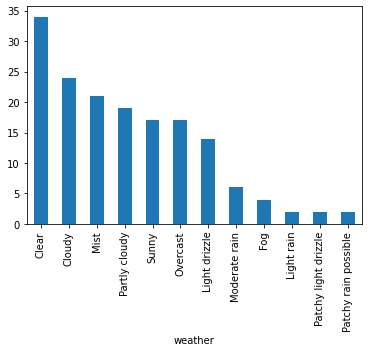

In [85]:
weather_data["weather"].value_counts().plot.bar()

In [84]:
weather_data["weather"].value_counts()

weather
Clear                   34
Cloudy                  24
Mist                    21
Partly cloudy           19
Sunny                   17
Overcast                17
Light drizzle           14
Moderate rain            6
Fog                      4
Light rain               2
Patchy light drizzle     2
Patchy rain possible     2
Name: count, dtype: int64

In [88]:
weather_update = {}
count = 0
for i in weather_data["weather"].unique():
    weather_update[i] = count
    count = count + 1

In [89]:
weather_update

{'Clear': 0,
 'Sunny': 1,
 'Mist': 2,
 'Light drizzle': 3,
 'Light rain': 4,
 'Overcast': 5,
 'Cloudy': 6,
 'Partly cloudy': 7,
 'Patchy light drizzle': 8,
 'Fog': 9,
 'Moderate rain': 10,
 'Patchy rain possible': 11}

In [90]:
for i in weather_data.index:
    weather_data["weather"][i] = weather_update[weather_data["weather"][i]]

In [91]:
weather_data.head()

,temperature,humidity,heatIndex,weather
0,2,92,2,0
1,2,85,2,0
2,2,78,2,0
3,2,72,2,0
4,1,72,1,0
...,...,...,...,...
203,7,88,7,6
205,7,84,7,6
207,7,82,7,1
209,5,87,5,0


In [92]:
# binary_weather = pd.get_dummies(weather_data["weather"],dtype=int)

In [93]:
# binary_weather

In [94]:
# weather_data.drop(['weather'],axis=1,inplace=True)

In [95]:
# df = weather_data.merge(binary_weather,left_on=weather_data.index,right_on=binary_weather.index)

In [96]:
# df.drop(['key_0'],axis = 1,inplace = True)

In [97]:
# df

In [127]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 210
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   temperature  162 non-null    int64 
 1   humidity     162 non-null    int64 
 2   heatIndex    162 non-null    int64 
 3   weather      162 non-null    object
dtypes: int64(3), object(1)
memory usage: 10.4+ KB


<AxesSubplot:>

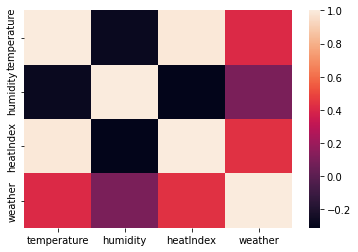

In [129]:
sns.heatmap(weather_data.corr())

## Training Model

In [224]:
X = weather_data.loc[:,["temperature","humidity","heatIndex"]]

In [225]:
X

,temperature,humidity,heatIndex
0,2,92,2
1,2,85,2
2,2,78,2
3,2,72,2
4,1,72,1
...,...,...,...
203,7,88,7
205,7,84,7
207,7,82,7
209,5,87,5


In [226]:
y = weather_data.iloc[:,3].astype(int)

In [227]:
y

0      0
1      0
2      0
3      0
4      0
      ..
203    6
205    6
207    1
209    0
210    0
Name: weather, Length: 162, dtype: int32

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [229]:
X_train.values.tolist()

[[9, 88, 9],
 [4, 87, 4],
 [7, 83, 7],
 [5, 96, 5],
 [4, 79, 5],
 [1, 74, 1],
 [13, 87, 11],
 [-1, 93, -1],
 [5, 81, 5],
 [3, 91, 3],
 [10, 82, 11],
 [1, 72, 1],
 [0, 93, 0],
 [13, 81, 13],
 [2, 93, 2],
 [6, 88, 6],
 [8, 90, 8],
 [6, 84, 6],
 [6, 91, 6],
 [4, 84, 4],
 [2, 92, 2],
 [3, 91, 3],
 [5, 85, 5],
 [1, 97, 1],
 [7, 95, 7],
 [4, 83, 5],
 [13, 87, 12],
 [10, 80, 11],
 [5, 94, 5],
 [13, 87, 10],
 [13, 89, 11],
 [3, 90, 3],
 [-1, 90, -1],
 [10, 78, 12],
 [0, 96, 0],
 [0, 91, 0],
 [7, 88, 7],
 [0, 94, 0],
 [5, 97, 5],
 [4, 84, 4],
 [1, 94, 1],
 [5, 98, 5],
 [13, 80, 13],
 [5, 86, 5],
 [3, 91, 3],
 [3, 89, 3],
 [1, 95, 1],
 [5, 87, 5],
 [3, 95, 3],
 [5, 93, 5],
 [8, 84, 8],
 [1, 73, 1],
 [3, 89, 3],
 [4, 86, 4],
 [3, 95, 3],
 [6, 91, 6],
 [12, 83, 13],
 [-1, 89, 0],
 [-1, 92, -1],
 [12, 82, 13],
 [5, 96, 5],
 [3, 82, 3],
 [7, 95, 7],
 [8, 95, 8],
 [5, 80, 5],
 [5, 86, 5],
 [1, 97, 1],
 [1, 82, 2],
 [4, 91, 4],
 [3, 94, 3],
 [3, 94, 4],
 [3, 86, 3],
 [4, 85, 4],
 [6, 90, 6],
 [2, 94, 

In [230]:
y_train.values.tolist()

[7,
 0,
 1,
 2,
 3,
 0,
 5,
 0,
 1,
 2,
 7,
 0,
 0,
 5,
 2,
 10,
 7,
 1,
 5,
 11,
 0,
 1,
 3,
 2,
 7,
 3,
 5,
 6,
 6,
 3,
 4,
 0,
 0,
 6,
 0,
 0,
 6,
 0,
 7,
 1,
 2,
 9,
 6,
 3,
 0,
 1,
 2,
 0,
 5,
 6,
 6,
 0,
 0,
 1,
 7,
 7,
 5,
 0,
 0,
 6,
 7,
 0,
 8,
 2,
 1,
 10,
 7,
 7,
 6,
 6,
 3,
 1,
 11,
 2,
 0,
 1,
 0,
 2,
 6,
 9,
 1,
 0,
 7,
 2,
 6,
 10,
 6,
 1,
 0,
 7,
 3,
 3,
 2,
 6,
 0,
 5,
 5,
 0,
 6,
 0,
 3,
 5,
 0,
 3,
 9,
 1,
 0,
 2,
 2,
 10,
 2,
 7,
 6]

In [231]:
## Standardize the dataset
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [232]:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [233]:
# X_train

In [234]:
# X_test

In [235]:
weather_classifier = DecisionTreeClassifier(random_state = 0)
weather_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [236]:
# from everywhereml.sklearn.ensemble import RandomForestClassifier

In [237]:
# weather_classifier = RandomForestClassifier()
# weather_classifier.fit(X_train,y_train)

In [238]:
type(weather_classifier)

sklearn.tree._classes.DecisionTreeClassifier

In [239]:
y_pred = pd.DataFrame(weather_classifier.predict(X_test),dtype = int,index = y_test.index, columns = ["weather"])

In [240]:
y_pred =np.array(y_pred["weather"],dtype = int)

In [241]:
type(y_pred)

numpy.ndarray

In [242]:
y_pred

array([ 1,  0,  0,  5,  0,  5,  7,  6,  7,  0,  2,  0,  7, 10,  5,  5,  3,
        3, 10,  2,  9,  2,  6,  3,  5,  2, 10,  5,  0,  6,  1,  0,  0,  3,
        0,  1,  7,  2,  7,  2,  5,  0,  0, 10,  0,  5,  0,  4,  0])

In [243]:
y_test = np.array(y_test,dtype = int)

In [244]:
type(y_test)

numpy.ndarray

In [245]:
y_test

array([ 6, 10,  0,  6,  0,  5,  6,  6,  6,  6,  2,  3,  2,  7,  4,  5,  6,
        3,  5,  2,  9,  2,  1,  1,  5,  7,  5,  2,  0, 10,  0,  0,  2,  5,
        0,  1,  7,  8,  2,  7,  3,  1,  7,  5,  0,  5,  7,  3,  6])

In [246]:
# Measure Accuracy
metrics.accuracy_score(y_test,y_pred)

0.3673469387755102

In [247]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.86      0.57         7
           1       0.33      0.25      0.29         4
           2       0.50      0.43      0.46         7
           3       0.25      0.25      0.25         4
           4       0.00      0.00      0.00         1
           5       0.50      0.50      0.50         8
           6       0.33      0.12      0.18         8
           7       0.20      0.17      0.18         6
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         2

    accuracy                           0.37        49
   macro avg       0.32      0.33      0.31        49
weighted avg       0.36      0.37      0.35        49



In [248]:
# weather_classifier.to_arduino(instance_name = "weatherClassifier")

In [249]:
print(port(weather_classifier))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[2] <= 3.5) {
                            if (x[1] <= 93.5) {
                                if (x[0] <= 2.5) {
                                    if (x[2] <= 1.5) {
                                        if (x[0] <= 0.5) {
                                            return 0;
                                        }

                                        else {
                                            if (x[1] <= 91.0) {
                                                return 0;
                                            }

                                            else {
                                                return 1;
                     

In [250]:
weather_classifier.predict([[39,43,98]])

array([6])